# Missing Data

As with many things in machine learning, there are no hard answers for
how to treat missing data. Also, missing data could represent different
situations.

There are also various ways to handle missing data:
- Remove any row with missing data
- Remove any column with missing data
- Impute missing values
- Create an indicator column to signify data was missing

In [15]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [2]:
# URL to the dataset
url = r"data/titanic.csv"

# Read the dataset
titanic_df = pd.read_csv(url)


# Examine the Missing Data
(
    titanic_df
    # Examine the null values
    .isnull()
    # Now, Find the Percentage of Null Values
    .mean()
    # Multiply by 100
    .mul(100)
)

pclass        0.000000
survived      0.000000
name          0.000000
sex           0.000000
age          20.091673
sibsp         0.000000
parch         0.000000
ticket        0.000000
fare          0.076394
cabin        77.463713
embarked      0.152788
boat         62.872422
body         90.756303
home.dest    43.086325
dtype: float64

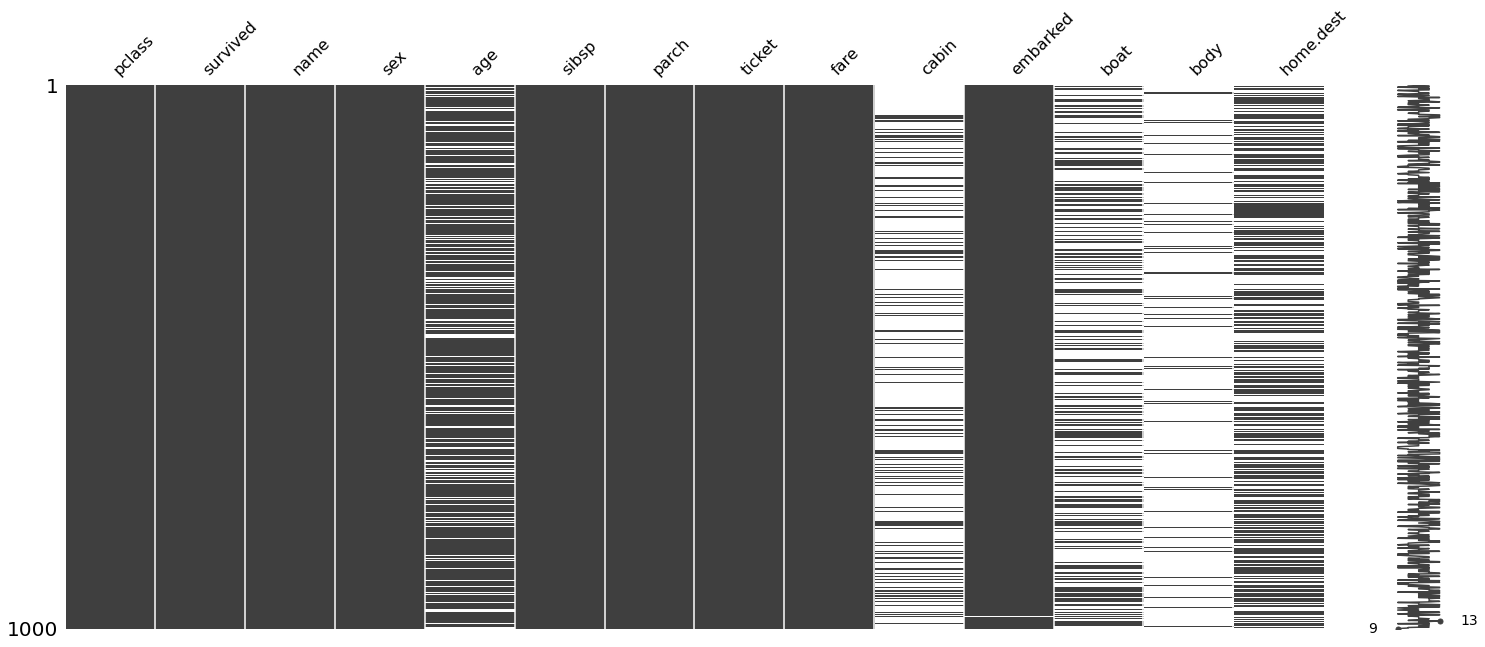

In [4]:
# Lets visualize the missing data

ax = msno.matrix(titanic_df.sample(n=1000))
ax.figure.savefig("missing_data.png")

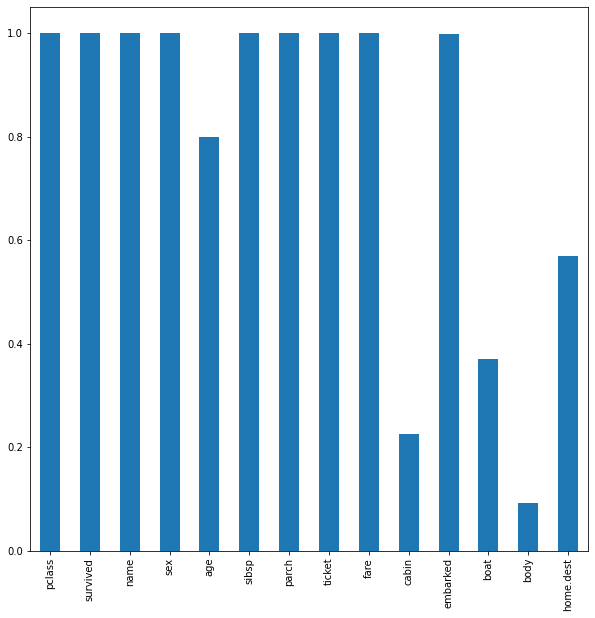

In [8]:
# Create a barplot of missing data counts
fig, ax = plt.subplots(figsize=(10, 10))
(1 - titanic_df.isnull().mean()).abs().plot.bar(ax=ax)
fig.savefig("missing_data_barplot.png")

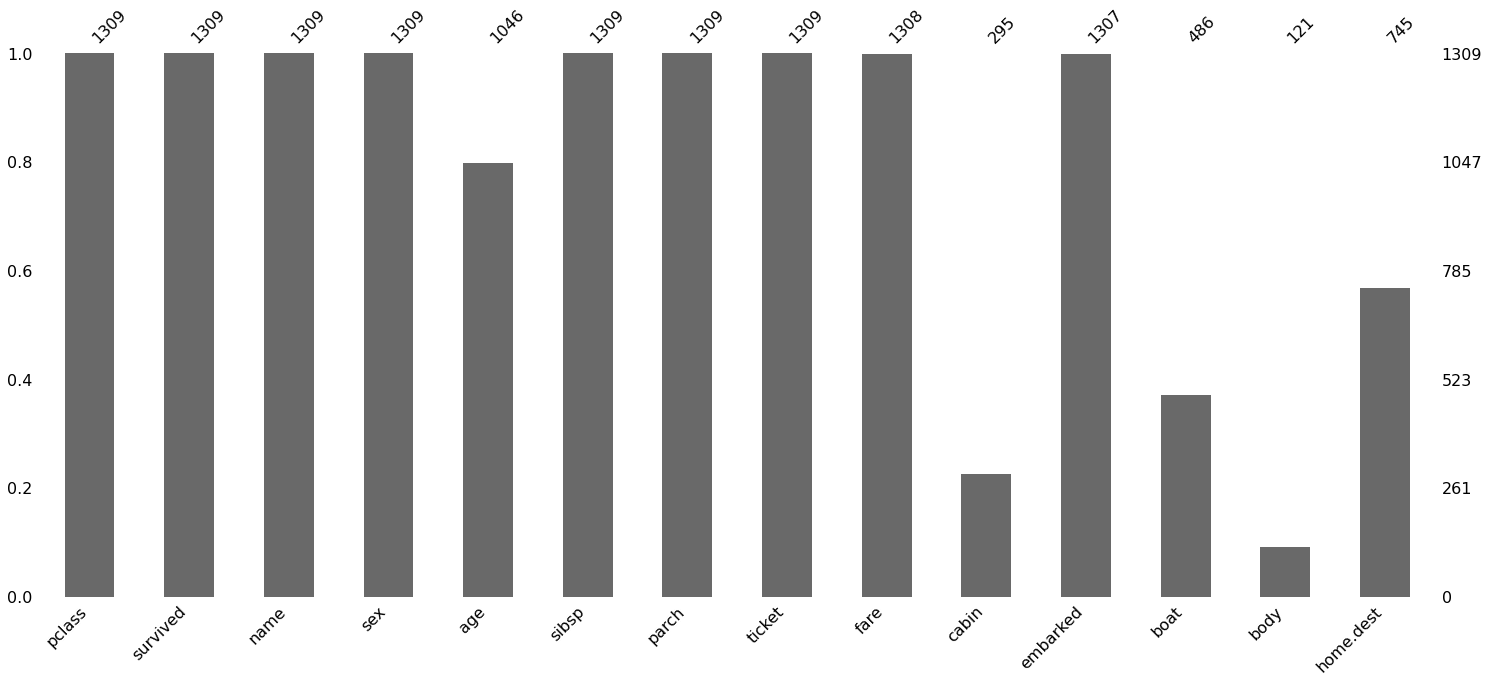

In [9]:
# Creating the missingno plot

ax = msno.bar(titanic_df)

ax.get_figure().savefig("missing_data_barplot.png") 

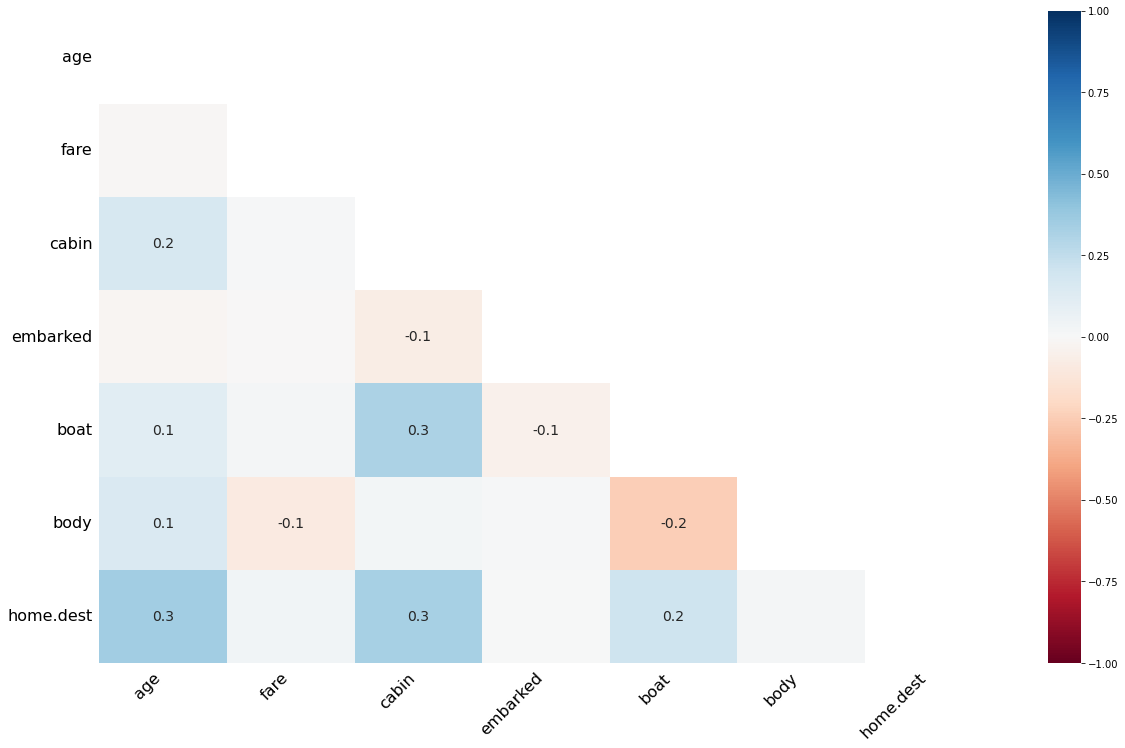

In [10]:
# Check for correlations with missing data

ax = msno.heatmap(titanic_df)
ax.get_figure().savefig("missing_data_heatmap.png")

> The appears to be no correlation between the missing records for respective columns

## Dropping Missing Data

The pandas library allows users to drop all rows with missing data with the `.dropna` method.

In [13]:
# Drop all rows with missing data
df_1 = titanic_df.dropna()

df_1.isnull().sum()

pclass       0.0
survived     0.0
name         0.0
sex          0.0
age          0.0
sibsp        0.0
parch        0.0
ticket       0.0
fare         0.0
cabin        0.0
embarked     0.0
boat         0.0
body         0.0
home.dest    0.0
dtype: float64

In [14]:
# Drop columns with NA (Do you really want to do this?)

df_1.dropna(axis=1)
# df_1 = df.drop(columns="cabin")

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest


## Imputing Data

Once you have a tool for predicting data, you can use that to predict missing
data. The general task of defining values for missing values is called
`imputation`.

If you are imputing data, you will need to build up a pipeline and use the
same imputation logic during model creation and prediction time. The
`SimpleImputer` class in scikit-learn will handle `mean, median, and most
frequent feature values`.

In [17]:
from unicodedata import numeric


num_cols = titanic_df.select_dtypes(include='number').columns


im = SimpleImputer(strategy='mean')

imputed = im.fit_transform(titanic_df[num_cols])